#Exercise 9.
* Exercise: Load the MNIST dataset (introduced in chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).
* Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [17]:
from sklearn.datasets import fetch_openml

In [18]:
mnist_ = fetch_openml(name="mnist_784", version='active')

In [19]:
X = mnist_["data"]
y = mnist_["target"]

In [20]:
from sklearn.ensemble import  RandomForestClassifier
random_forest = RandomForestClassifier()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=60000)

In [22]:
import time
t0 = time.time()
random_forest.fit(X_train, y_train)
t1 = time.time()
print(f'Training time: {t1-t0}')

Training time: 38.18222427368164


* Evaluate the model

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(random_forest.predict(X_test), y_test)

0.9691

* Let's try reducing the dimentionality 

In [24]:
from sklearn.decomposition import PCA
PCA_transformer = PCA(n_components=0.95)

In [25]:
X_PCA_transformed = PCA_transformer.fit_transform(X_train)

In [26]:
t0 = time.time()
random_forest.fit(X_PCA_transformed, y_train)
t1 = time.time()
print(f'Training time: {t1-t0}')

Training time: 98.422119140625


* It took much longer to train
* Let's evaluate the model

In [27]:
X_test_reduced = PCA_transformer.transform(X_test)
accuracy_score(random_forest.predict(X_test_reduced), y_test)

0.9475

* Let's Try a softmax classifier 

In [28]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)

In [29]:
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()
print(f'Training time: {t1-t0}')

Training time: 30.237483263015747


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
accuracy_score(log_clf.predict(X_test), y_test)

0.9208

In [31]:
t0 = time.time()
log_clf.fit(X_PCA_transformed, y_train)
t1 = time.time()
print(f'Training time: {t1-t0}')

Training time: 9.887213706970215


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
accuracy_score(log_clf.predict(X_test_reduced), y_test)

0.9142

* For the Softmax model the training time was reduced by about 3 times and the accuracy is slightly the same.

## Exercise 10.
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.

The MNIST dataset was loaded above.

Dimensionality reduction on the full 60,000 images takes a very long time, so let's only do this on a random subset of 1,000 images:

In [57]:

from sklearn.manifold import TSNE
import numpy as np

np.random.seed(42)

m = 2000
idx = np.random.permutation(60000)[:m]

X_subset = mnist_['data'][idx]
y_subset = mnist_['target'][idx]

In [80]:
t_sne = TSNE(n_components=2)

In [81]:
X_t_sne = t_sne.fit_transform(X_subset)

In [82]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

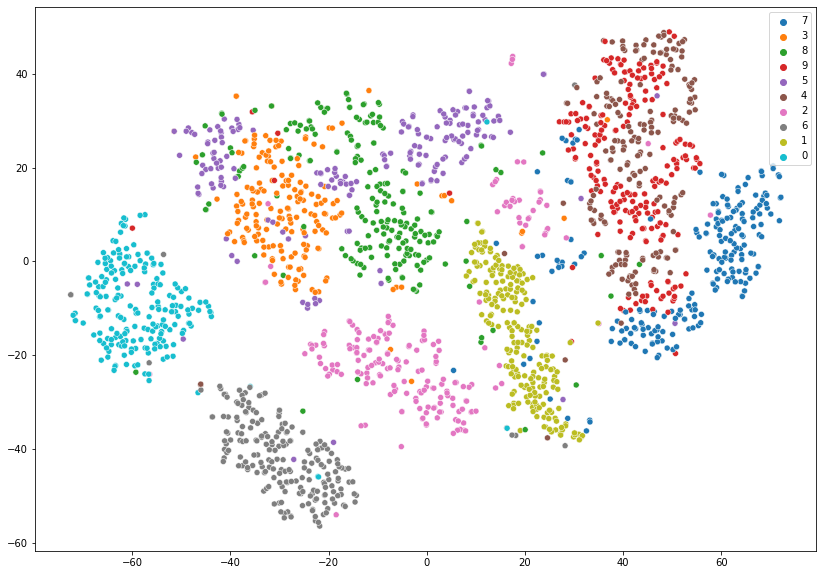

In [95]:
import matplotlib.pyplot as plt
from google.colab import files
plt.figure(figsize=(14,10))

sns.scatterplot(X_t_sne[:,0], X_t_sne[:,1], hue=y_subset)
plt.savefig('t_sne_numbers.png')
files.download('t_sne_numbers.png')

* Let's compare the visualization with PCA

In [85]:
pca = PCA(n_components=2)
X_subset_PCA = pca.fit_transform(X_subset)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


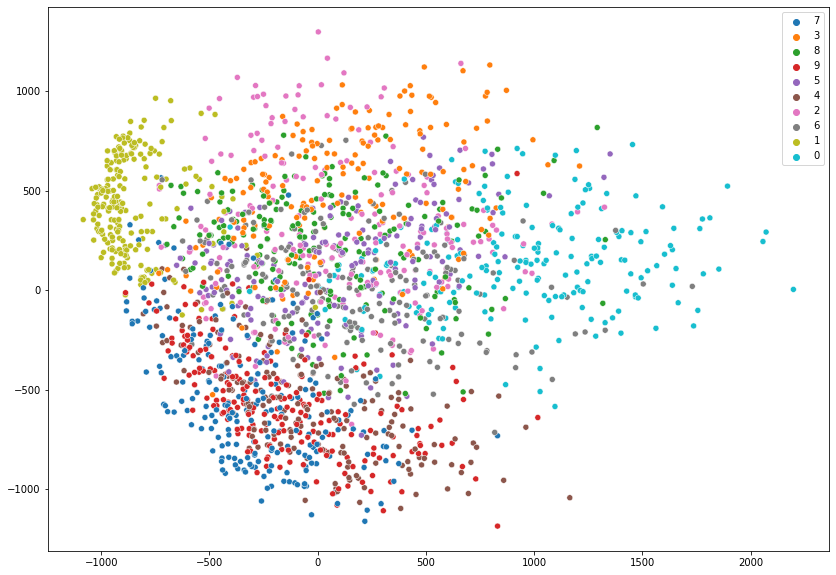

In [87]:

plt.figure(figsize=(14,10))

sns.scatterplot(X_subset_PCA[:,0], X_subset_PCA[:,1], hue=y_subset)

* Now let's see LLE


In [90]:
from sklearn.manifold import LocallyLinearEmbedding
LLE = LocallyLinearEmbedding(n_components=2)

In [91]:
X_subset_LLE = LLE.fit_transform(X_subset)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


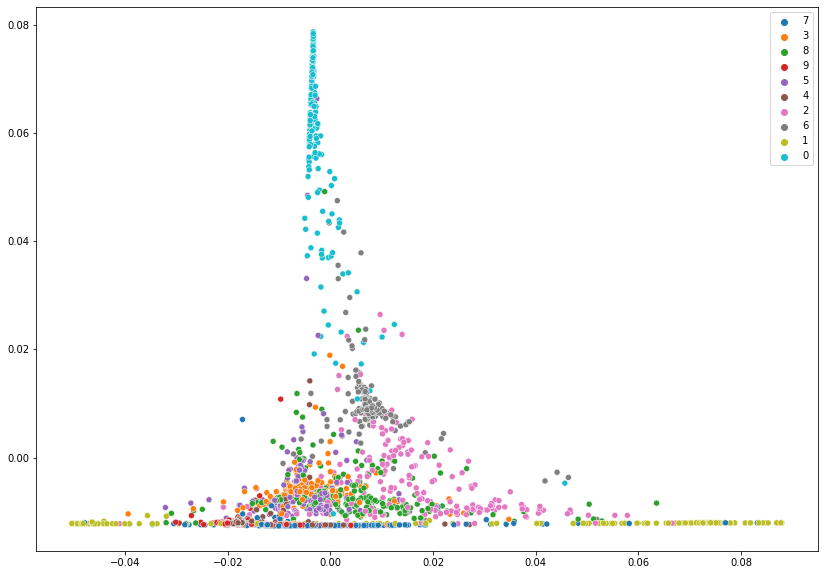

In [92]:
plt.figure(figsize=(14,10))

sns.scatterplot(X_subset_LLE[:,0], X_subset_LLE[:,1], hue=y_subset)

In [93]:
X_train.shape

(60000, 784)